<a href="https://colab.research.google.com/github/dpanagop/data_analytics_examples/blob/master/Mapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install scikit-tda;
!pip install umap-learn;

Load libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import  MinMaxScaler
from sklearn.decomposition import PCA
import sklearn
import umap
import kmapper as km
%matplotlib inline

## Two squares

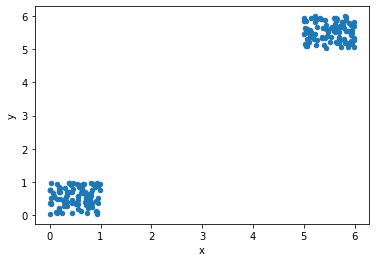

In [ ]:
data1 = np.random.random((100,2))
data2 = np.random.random((100,2))+5
data = pd.DataFrame(data1,columns=['x','y'])
data = data.append(pd.DataFrame(data2,columns=['x','y']))
data.plot.scatter(x='x',y='y')

In [ ]:
# Initialize to use projection on 1st coordinate
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(data[['x','y']].to_numpy(),projection=[0])
# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(
    projected_data,
    clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5),
    cover=km.Cover(10, 0.2),
)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (200, 2)

..Projecting data using: [0]

..Scaling with: MinMaxScaler()

Mapping on data shaped (200, 1) using lens shaped (200, 1)

Creating 10 hypercubes.

Created 2 edges and 4 nodes in 0:00:00.007740.


In [ ]:
square_tag = np.concatenate([np.repeat(1,100),np.repeat(2,100)])
labels= np.column_stack([data['x'].to_numpy(),data['y'].to_numpy(),square_tag])
mapper.visualize(
    graph, 
    color_values=labels,
    node_color_function=["mean", "std", "median", "max"],
    color_function_name=['x','y','circle tag'],
    custom_tooltips=square_tag,
    path_html="Two squares.html",
    title="Two squares");

Wrote visualization to: Two squares.html


no display found. Using non-interactive Agg backend


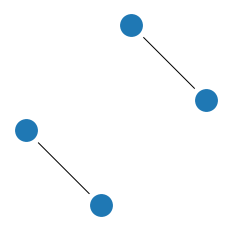

In [ ]:
km.draw_matplotlib(graph)
plt.show()

## Two circles

In [ ]:
# set number of points
# n for inner circle
# 2n for outter
# 3n in total
n=500
data1_radius = pd.DataFrame(np.random.random((n,1))+1,columns=['r'])
data1_angle = pd.DataFrame(np.random.random((n,1))*2*np.pi,columns=['a'])
data1=pd.concat([data1_radius,data1_angle],axis=1)
data2_angle = pd.DataFrame(np.random.random((2*n,1))*2*np.pi,columns=['a'])
data2_radius = pd.DataFrame((np.random.random((2*n,1))+1)*5,columns=['r'])
data2=pd.concat([data2_radius,data2_angle],axis=1)
data = data1.append(data2)
data['x']=data['r']*np.cos(data['a'])
data['y']=data['r']*np.sin(data['a'])

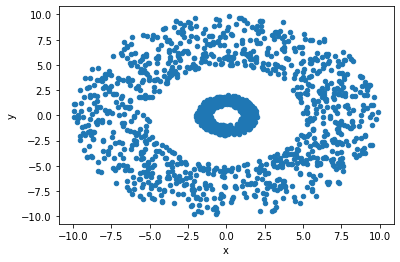

In [ ]:
data.plot.scatter(x='x',y='y')

In [ ]:
# Initialize to use projection on 1st and 2nd coordinates
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(data[['x','y']].to_numpy(),projection=[0,1],scaler=None)
# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(
    projected_data,
    clusterer=sklearn.cluster.DBSCAN(eps=1, min_samples=5),
    cover=km.Cover(10, 0.4),
)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (1500, 2)

..Projecting data using: [0, 1]
Mapping on data shaped (1500, 2) using lens shaped (1500, 2)

Creating 100 hypercubes.

Created 266 edges and 93 nodes in 0:00:00.154489.


In [ ]:
circle_tag = np.concatenate([np.repeat(1,500),np.repeat(2,1000)])
labels= np.column_stack([data['x'].to_numpy(),data['y'].to_numpy(),circle_tag])
mapper.visualize(
    graph, 
    color_values=labels,
    node_color_function=["mean", "std", "median", "max"],
    color_function_name=['x','y','circle tag'],
    custom_tooltips=circle_tag,
    path_html="Two circles.html",
    title="Two circles");

Wrote visualization to: Two circles.html


no display found. Using non-interactive Agg backend


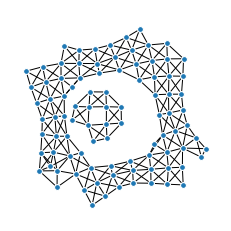

In [ ]:
km.draw_matplotlib(graph)
plt.show()

In [ ]:
# Initialize to use projection on 1st and 2nd coordinates
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(data[['x','y']].to_numpy(),projection=[0,1],scaler=None)
# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(
    projected_data,
    clusterer=sklearn.cluster.AgglomerativeClustering(n_clusters=2,linkage='single'), #KMeans(n_clusters=3, random_state=1618033),
    cover=km.Cover(10, 0.4),
    remove_duplicate_nodes=True
)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: None
..Projecting on data shaped (1500, 2)

..Projecting data using: [0, 1]
Mapping on data shaped (1500, 2) using lens shaped (1500, 2)

Creating 100 hypercubes.
Merged 14 duplicate nodes.

Number of nodes before merger: 190; after merger: 176


Created 440 edges and 176 nodes in 0:00:00.096017.


In [ ]:
circle_tag = np.concatenate([np.repeat(1,500),np.repeat(2,1000)])
labels= np.column_stack([data['x'].to_numpy(),data['y'].to_numpy(),circle_tag])
mapper.visualize(
    graph, 
    color_values=labels,
    node_color_function=["mean", "std", "median", "max"],
    color_function_name=['x','y','circle tag'],
    custom_tooltips=circle_tag,
    path_html="Two circles - Ward.html",
    title="Two circles - Ward");

Wrote visualization to: Two circles - Ward.html


no display found. Using non-interactive Agg backend


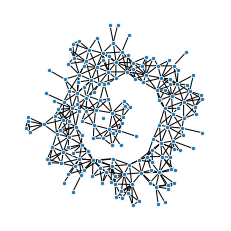

In [ ]:
km.draw_matplotlib(graph)
plt.show()

## Iris dataset

In [ ]:
iris =  datasets.load_iris()
X = iris.data
labels = iris.target
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled= pd.DataFrame(X_scaled)

In [ ]:
# Initialize to use PCA with 2 components (reduces data to 2 dimensions). 
mapper = km.KeplerMapper(verbose=1)

# Fit and transform data
# Alternative projections -- If use the load libraries
#projected_data = mapper.fit_transform(X_scaled, projection=sklearn.manifold.TSNE())
#projected_data = mapper.fit_transform(X_scaled,umap.UMAP(n_components=2,random_state=42))
projected_data = mapper.fit_transform(X_scaled,PCA(n_components=2))
# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(
    projected_data,
    clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5),
    cover=km.Cover(5, 0.2),
)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=2)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (150, 4)

..Projecting data using: 
	PCA(n_components=2)


..Scaling with: MinMaxScaler()

Mapping on data shaped (150, 2) using lens shaped (150, 2)

Creating 25 hypercubes.

Created 15 edges and 12 nodes in 0:00:00.012857.


In [ ]:
mapper.visualize(
    graph, 
    color_values=labels,
    node_color_function=["mean", "std", "median", "max"],
    color_function_name=['cluster'],
    custom_tooltips=labels,
    path_html="Iris_PCA.html",
    title="Iris_PCA");

Wrote visualization to: Iris_PCA.html


no display found. Using non-interactive Agg backend


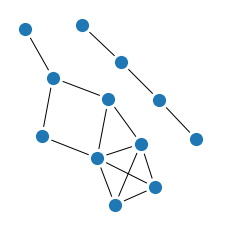

In [ ]:
km.draw_matplotlib(graph)
plt.show()

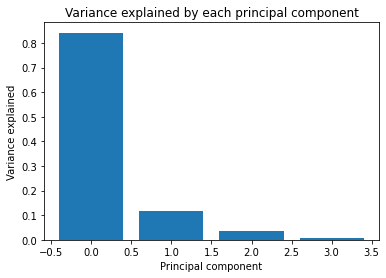

In [ ]:
pca = PCA()
x_pca=pca.fit_transform(X_scaled)
# Investigate the variance accounted for by each principal component.
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Variance explained by each principal component")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.show()

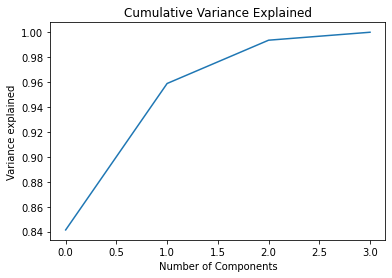

In [ ]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Variance explained")
plt.show()

## Bank Marketing

In [ ]:
%%capture
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip 'bank-additional.zip'

In [ ]:
data=pd.read_csv('bank-additional/bank-additional-full.csv',sep=';')
data= data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','y']]

In [ ]:
data['default'] = data['default'].map({'yes': 1, 'no': 0})
data['housing'] = data['housing'].map({'yes': 1, 'no': 0})
data['loan'] = data['loan'].map({'yes': 1, 'no': 0})
data['education'] = data['education'].map({'illiterate':0, 'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4,
                                           'professional.course':5, 'university.degree':6})
data['y'] = data['y'].map({'no':0, 'yes':1})

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import  MinMaxScaler
enc = OneHotEncoder(sparse=False,handle_unknown='error')
data_enc = enc.fit_transform(data[['job']])
cols=list(enc.categories_[0])[:-1]
cols.append('unknown_job')
job = pd.DataFrame(data_enc,columns=cols)

In [ ]:
data = pd.concat([data, job], axis=1)

In [ ]:
enc = OneHotEncoder(sparse=False,handle_unknown='error')
data_enc = enc.fit_transform(data[['marital']])
cols=list(enc.categories_[0])[:-1]
cols.append('unknown_marital')
marital = pd.DataFrame(data_enc,columns=cols)
data = pd.concat([data, marital], axis=1)
data = data.drop(columns=['job','marital'])

In [ ]:
data = data[(~(data.education.isnull()))&(~(data.default.isnull()))&(~(data.housing.isnull()))&(~(data.loan.isnull()))&(data.unknown_job!=1)&(data.unknown_marital!=1)]
y=data.y
data = data.drop('y',axis=1)

In [ ]:
data.head()

,age,education,default,housing,loan,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown_job,divorced,married,single,unknown_marital
0,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,40,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,56,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,59,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)
X_scaled= pd.DataFrame(X_scaled)

In [ ]:
# Initialize to use PCA with 2 components (reduces data to 2 dimensions).
mapper = km.KeplerMapper(verbose=1)

# Fit and transform data
# Alternative projections -- If use the load libraries
#projected_data = mapper.fit_transform(X_scaled, projection=sklearn.manifold.TSNE())
#projected_data = mapper.fit_transform(X_scaled,umap.UMAP(n_components=2,random_state=42))
projected_data = mapper.fit_transform(X_scaled,PCA(n_components=2))
# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(
    projected_data,
    clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5),
    cover=km.Cover(10, 0.5),
)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=2)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (30488, 21)

..Projecting data using: 
	PCA(n_components=2)


..Scaling with: MinMaxScaler()

Mapping on data shaped (30488, 2) using lens shaped (30488, 2)

Creating 100 hypercubes.

Created 230 edges and 102 nodes in 0:00:04.139231.


In [ ]:
labels=np.column_stack([data.age.to_numpy(),
                       data.education.to_numpy(),
                       data.default.to_numpy(),
                       data.housing.to_numpy(),
                       data.loan.to_numpy(),
                       data['admin.'].to_numpy(),
                       data['blue-collar'].to_numpy(),
                       data.entrepreneur.to_numpy(),
                       data.housemaid.to_numpy(),
                       data.management.to_numpy(),
                       data.retired.to_numpy(),
                       data['self-employed'].to_numpy(),
                       data.services.to_numpy(),
                       data.student.to_numpy(),
                       data.technician.to_numpy(),
                       data.unemployed.to_numpy(),
                       data.unknown_job.to_numpy(),
                       data.divorced.to_numpy(),
                       data.married.to_numpy(),
                       data.single.to_numpy(),
                       data.unknown_marital.to_numpy(),
                       y.to_numpy()
])

In [ ]:
mapper.visualize(
    graph, 
    color_values=labels,
    node_color_function=["mean", "std", "median", "max"],
    color_function_name=['age', 'education', 'default', 'housing', 'loan', 'admin.',
                         'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
                         'self-employed', 'services', 'student', 'technician', 'unemployed',
                         'unknown_job', 'divorced', 'married', 'single', 'unknown_marital','y'],
    custom_tooltips=y.to_numpy(),
    path_html="Bank Marketing.html",
    title="Bank Marketing");

Wrote visualization to: Bank Marketing.html


no display found. Using non-interactive Agg backend


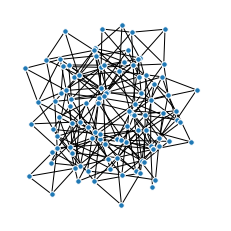

In [ ]:
km.draw_matplotlib(graph)
plt.show()

In [ ]:
# Initialize to use UMAP with 2 components (reduces data to 2 dimensions). Also note high overlap_percentage.
mapper = km.KeplerMapper(verbose=1)

# Fit and transform data
# Alternative projections -- If use the load libraries
# projected_data = mapper.fit_transform(X_scaled, projection=sklearn.manifold.TSNE())
projected_data = mapper.fit_transform(X_scaled,umap.UMAP(n_components=2,random_state=42))
# projected_data = mapper.fit_transform(X_scaled,PCA(n_components=2))
# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(
    projected_data,
    clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5),
    cover=km.Cover(15, 0.3),
)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: UMAP(random_state=42)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (30488, 21)

..Projecting data using: 
	UMAP(random_state=42, verbose=1)

UMAP(random_state=42, verbose=1)
Mon Jan 10 19:40:08 2022 Construct fuzzy simplicial set
Mon Jan 10 19:40:08 2022 Finding Nearest Neighbors
Mon Jan 10 19:40:08 2022 Building RP forest with 14 trees


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Mon Jan 10 19:40:12 2022 NN descent for 15 iterations
	 1  /  15
	 2  /  15
	 3  /  15
	Stopping threshold met -- exiting after 3 iterations
Mon Jan 10 19:40:30 2022 Finished Nearest Neighbor Search
Mon Jan 10 19:40:33 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Mon Jan 10 19:41:50 2022 Finished embedding

..Scaling with: MinMaxScaler()

Mapping on data shaped (30488, 2) using lens shaped (30488, 2)

Creating 225 hypercubes.

Created 615 edges and 199 nodes in 0:00:01.019338.


In [ ]:
mapper.visualize(
    graph, 
    color_values=labels,
    node_color_function=["mean", "std", "median", "max"],
    color_function_name=['age', 'education', 'default', 'housing', 'loan', 'admin.',
                         'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
                         'self-employed', 'services', 'student', 'technician', 'unemployed',
                         'unknown_job', 'divorced', 'married', 'single', 'unknown_marital','y'],
    custom_tooltips=y.to_numpy(),
    path_html="Bank Marketing - Umap.html",
    title="Bank Marketing - Umap");

Wrote visualization to: Bank Marketing - Umap.html


no display found. Using non-interactive Agg backend


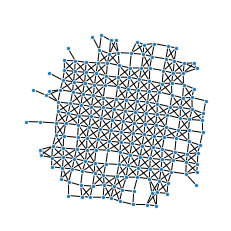

In [ ]:
km.draw_matplotlib(graph)
plt.show()

In [ ]:
# Initialize to use PCA with 5 components (reduces data to 5 dimensions).
mapper = km.KeplerMapper(verbose=1)

# Fit and transform data
# Alternative projections -- If use the load libraries
#projected_data = mapper.fit_transform(X_scaled, projection=sklearn.manifold.TSNE())
#projected_data = mapper.fit_transform(X_scaled,umap.UMAP(n_components=2,random_state=42))
projected_data = mapper.fit_transform(X_scaled,PCA(n_components=5))
# Create the graph (we cluster on the projected data and suffer projection loss)
graph = mapper.map(
    projected_data,
    clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5),
    cover=km.Cover(5, 0.3),
)

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=5)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (30488, 21)

..Projecting data using: 
	PCA(n_components=5)


..Scaling with: MinMaxScaler()

Mapping on data shaped (30488, 5) using lens shaped (30488, 5)

Creating 3125 hypercubes.

Created 1032 edges and 242 nodes in 0:00:07.111455.


In [ ]:
mapper.visualize(
    graph, 
    color_values=labels,
    node_color_function=["mean", "std", "median", "max"],
    color_function_name=['age', 'education', 'default', 'housing', 'loan', 'admin.',
                         'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
                         'self-employed', 'services', 'student', 'technician', 'unemployed',
                         'unknown_job', 'divorced', 'married', 'single', 'unknown_marital','y'],
    custom_tooltips=y.to_numpy(),
    path_html="Bank Marketing - More PCA components.html",
    title="Bank Marketing - More PCA components");

Wrote visualization to: Bank Marketing - More PCA components.html


no display found. Using non-interactive Agg backend


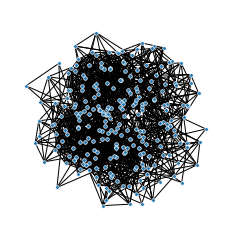

In [ ]:
km.draw_matplotlib(graph)
plt.show()

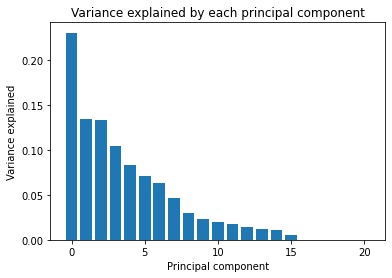

In [ ]:
pca = PCA()
x_pca=pca.fit_transform(X_scaled)
# Investigate the variance accounted for by each principal component.
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Variance explained by each principal component")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.show()

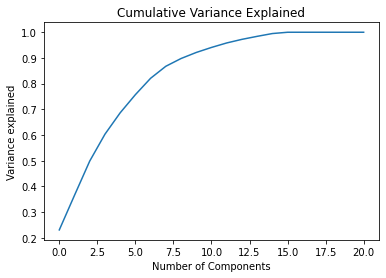

In [ ]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Variance explained")
plt.show()